Average Accuracy: 0.8179068360556564


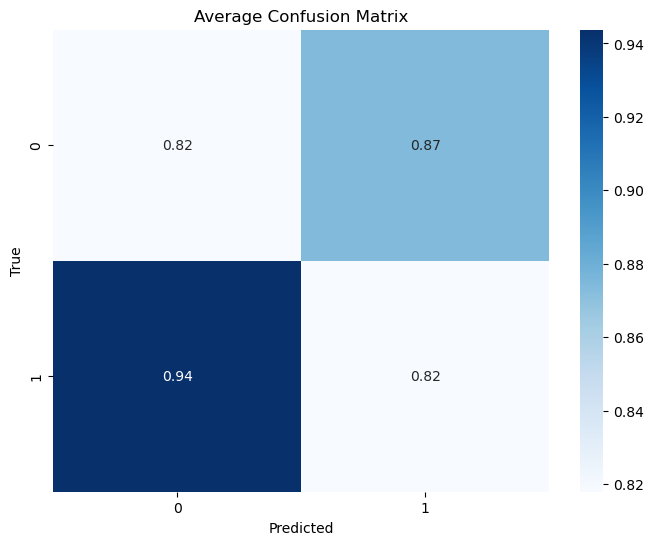

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
data = pd.read_csv('DataTableToRegress.csv')
features = ['Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Nb']

# Assume 'target_column' is the name of your target variable
X = pd.DataFrame(data[features], columns=features)  # Features

# Assume 'target_column' is the name of your target variable
ylog = data['Acceptable']  # Target variable

# Initialize variables to store overall evaluation metrics
total_accuracy = 0
total_conf_matrix = np.zeros((2, 2))

# Iterate over each row, using it as the test data
for index, row in data.iterrows():
    # Set the current row as the test data
    X_test = row[features].values.reshape(1, -1)
    X_test_df = pd.DataFrame(X_test, columns=features)  # Set the feature names
    y_test = np.array([ylog[index]])

    # Use the rest of the data for training
    X_train = data.drop(index)[features]
    X_train.columns = features  # Set the feature names
    y_train = data.drop(index)['Acceptable']

    # Initialize the logistic regression model
    logreg = LogisticRegression(max_iter=1000)

    # Fit the model using the training data
    logreg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = logreg.predict(X_test_df)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    total_accuracy += accuracy

    conf_matrix = confusion_matrix(y_test, y_pred)
    total_conf_matrix += conf_matrix

# Calculate average accuracy
average_accuracy = total_accuracy / len(data)

# Calculate average confusion matrix
average_conf_matrix = total_conf_matrix / len(data)

# Display average accuracy
print('Average Accuracy:', average_accuracy)

# Plot average Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


Average Accuracy: 0.8445


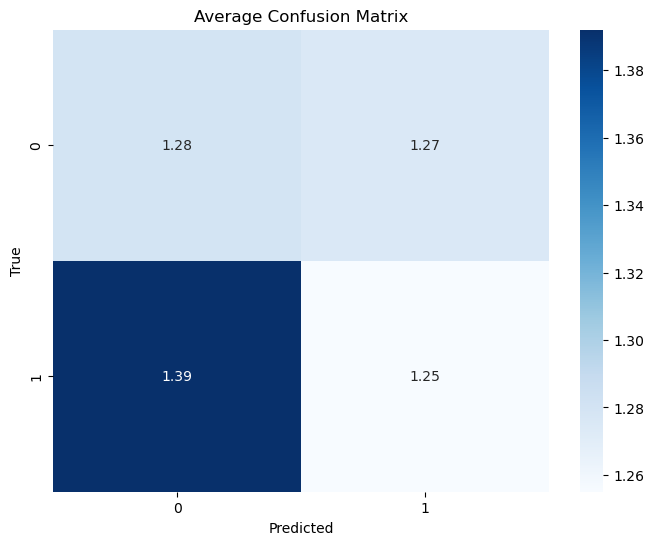

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
data = pd.read_csv('DataTableToRegress.csv')
features = ['Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Nb']

# Assume 'target_column' is the name of your target variable
X = pd.DataFrame(data[features], columns=features)  # Features

# Assume 'target_column' is the name of your target variable
ylog = data['Acceptable']  # Target variable

# Initialize variables to store overall evaluation metrics
total_accuracy = 0
total_conf_matrix = np.zeros((2, 2))

# Initialize KFold with 5 splits
kf = KFold(n_splits=1000)

# Iterate over the 5 folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = ylog.iloc[train_index], ylog.iloc[test_index]

    # Initialize the logistic regression model
    logreg = LogisticRegression(max_iter=1000)

    # Fit the model using the training data
    logreg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = logreg.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    total_accuracy += accuracy

    conf_matrix = confusion_matrix(y_test, y_pred)
    total_conf_matrix += conf_matrix

# Calculate average accuracy
average_accuracy = total_accuracy / kf.get_n_splits()

# Calculate average confusion matrix
average_conf_matrix = total_conf_matrix / kf.get_n_splits()

# Display average accuracy
print('Average Accuracy:', average_accuracy)

# Plot average Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


Average Accuracy: 0.8056617647058821
Average Precision: 0.8546431812702626
Average Recall: 0.8056617647058821
Average F1 Score: 0.8107217411337453


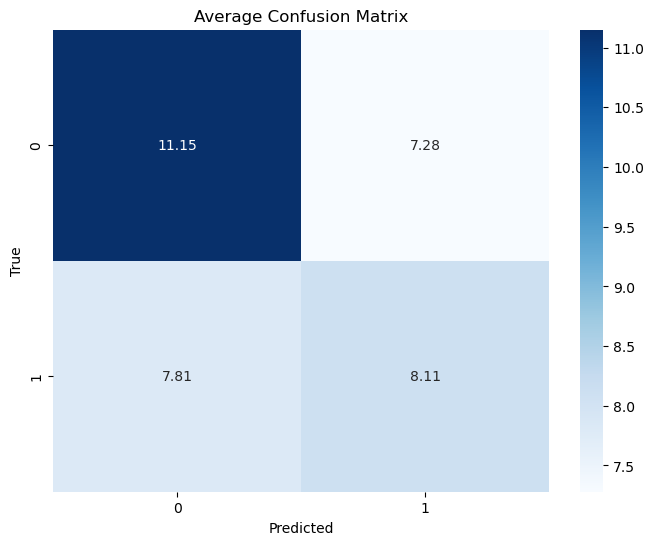

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
data = pd.read_csv('DataTableToRegress.csv')
features = ['Al', 'Cu', 'Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Mo', 'Nb']

# Assume 'target_column' is the name of your target variable
X = pd.DataFrame(data[features], columns=features)  # Features

# Assume 'target_column' is the name of your target variable
ylog = data['Acceptable']  # Target variable

# Initialize variables to store overall evaluation metrics
total_accuracy = 0
total_conf_matrix = np.zeros((2, 2))
total_precision = 0
total_recall = 0
total_f1_score = 0

# Initialize KFold with 100 splits
kf = KFold(n_splits=100)

# Iterate over the 100 folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = ylog.iloc[train_index], ylog.iloc[test_index]

    # Initialize the logistic regression model
    logreg = LogisticRegression(max_iter=1000)

    # Fit the model using the training data
    logreg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = logreg.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    total_accuracy += accuracy

    conf_matrix = confusion_matrix(y_test, y_pred)
    total_conf_matrix += conf_matrix

    # Calculate precision, recall, and f1-score for each class
    class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
    total_precision += class_report['weighted avg']['precision']
    total_recall += class_report['weighted avg']['recall']
    total_f1_score += class_report['weighted avg']['f1-score']

# Calculate average metrics
average_accuracy = total_accuracy / kf.get_n_splits()
average_conf_matrix = total_conf_matrix / kf.get_n_splits()
average_precision = total_precision / kf.get_n_splits()
average_recall = total_recall / kf.get_n_splits()
average_f1_score = total_f1_score / kf.get_n_splits()

# Display average metrics
print('Average Accuracy:', average_accuracy)
print('Average Precision:', average_precision)
print('Average Recall:', average_recall)
print('Average F1 Score:', average_f1_score)

# Plot average Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


Total Confusion Matrix:
[[1352. 1445.]
 [1560. 1352.]]


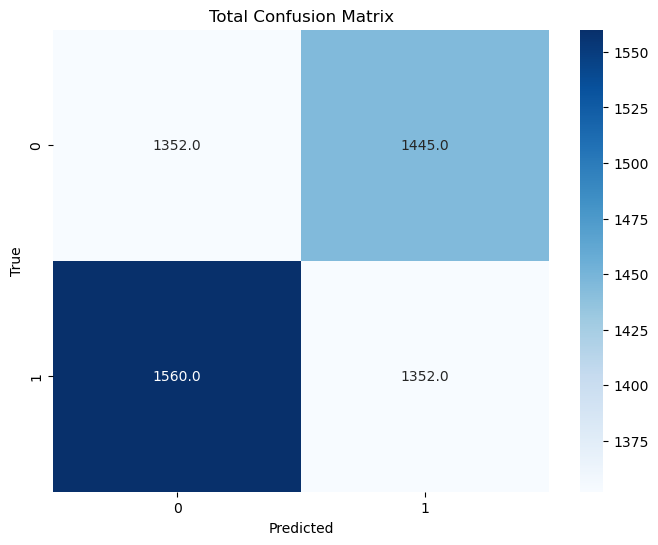

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
data = pd.read_csv('DataTableToRegress.csv')
features = ['Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Nb']

# Assume 'target_column' is the name of your target variable
X = pd.DataFrame(data[features], columns=features)  # Features

# Assume 'target_column' is the name of your target variable
ylog = data['Acceptable']  # Target variable

# Initialize variables to store overall evaluation metrics
total_conf_matrix = np.zeros((2, 2))

# Iterate over each row, using it as the test data
for index, row in data.iterrows():
    # Set the current row as the test data
    X_test = row[features].values.reshape(1, -1)
    X_test_df = pd.DataFrame(X_test, columns=features)  # Set the feature names
    y_test = np.array([ylog[index]])

    # Use the rest of the data for training
    X_train = data.drop(index)[features]
    X_train.columns = features  # Set the feature names
    y_train = data.drop(index)['Acceptable']

    # Initialize the logistic regression model
    logreg = LogisticRegression(max_iter=1000)

    # Fit the model using the training data
    logreg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = logreg.predict(X_test_df)

    # Evaluate the model
    conf_matrix = confusion_matrix(y_test, y_pred)
    total_conf_matrix += conf_matrix

# Display the total confusion matrix
print('Total Confusion Matrix:')
print(total_conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(total_conf_matrix, annot=True, fmt='.1f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Total Confusion Matrix')
plt.show()
